## Module 6 : Clustering & PCA Assignment_

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid", color_codes=True)

## Step 1: Data Prepration and Quality check

In [2]:
#Import the data
df = pd.read_csv("Country-data.csv")
df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [4]:
#Check for Na Value
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
#Check for Duplicate data
df.duplicated().sum()

0

In [6]:
# Converting the feature vlaue from % to absolute 
df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

In [7]:
df.shape

(167, 10)

In [8]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Step 2: EDA

<Figure size 1800x1800 with 0 Axes>

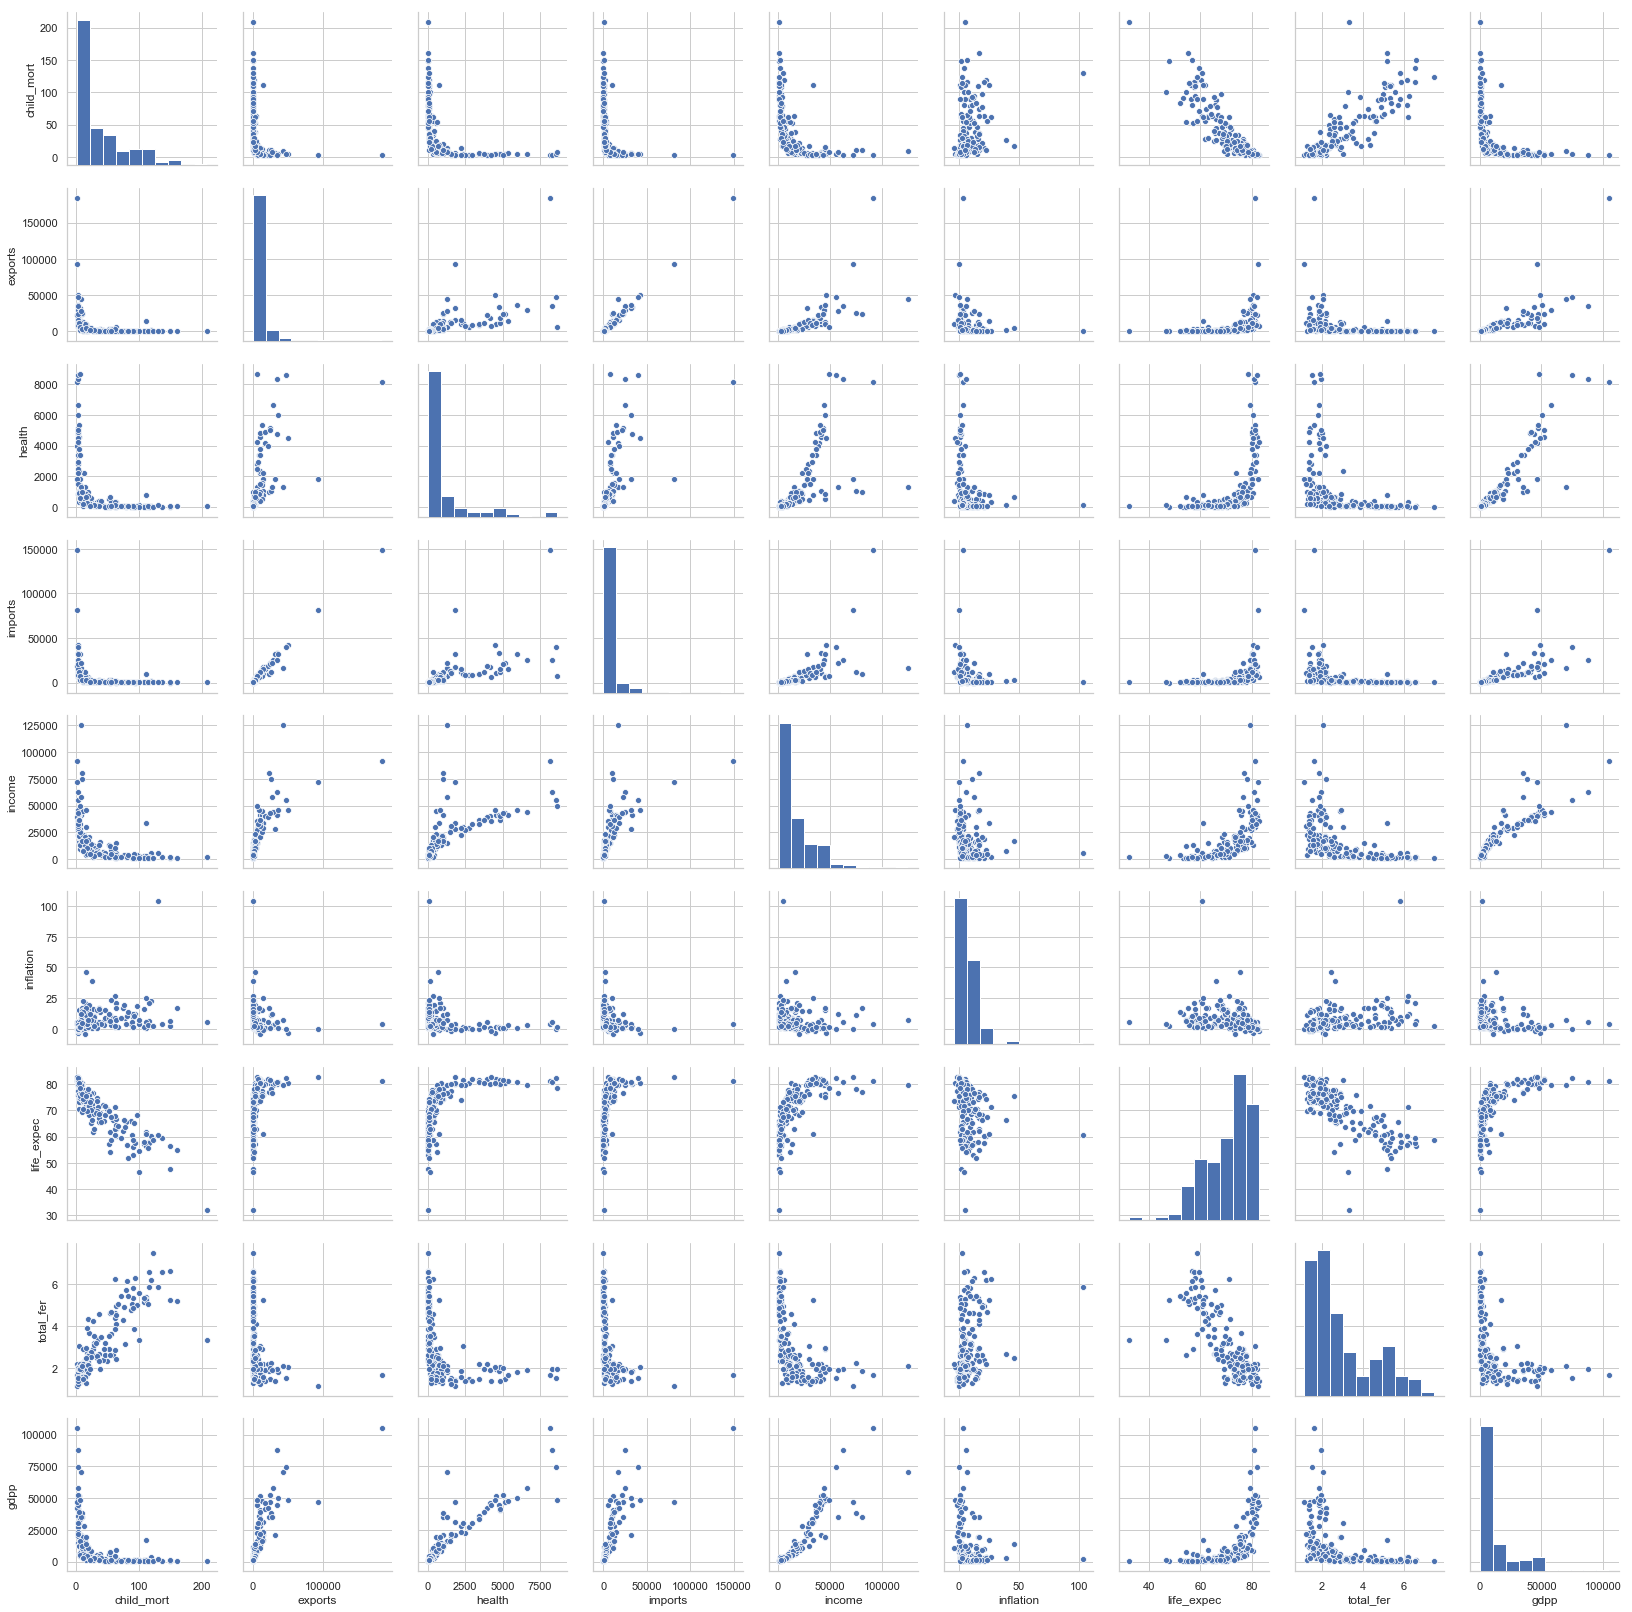

In [9]:
plt.figure(figsize = (25,25))
sns.pairplot(df)

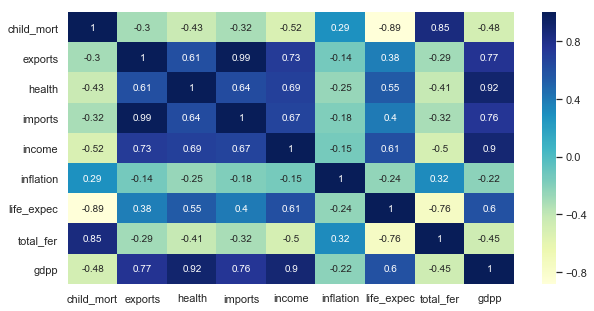

In [10]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [11]:
df_out = df.drop(['country'],axis=1)

### Outlier Treatment

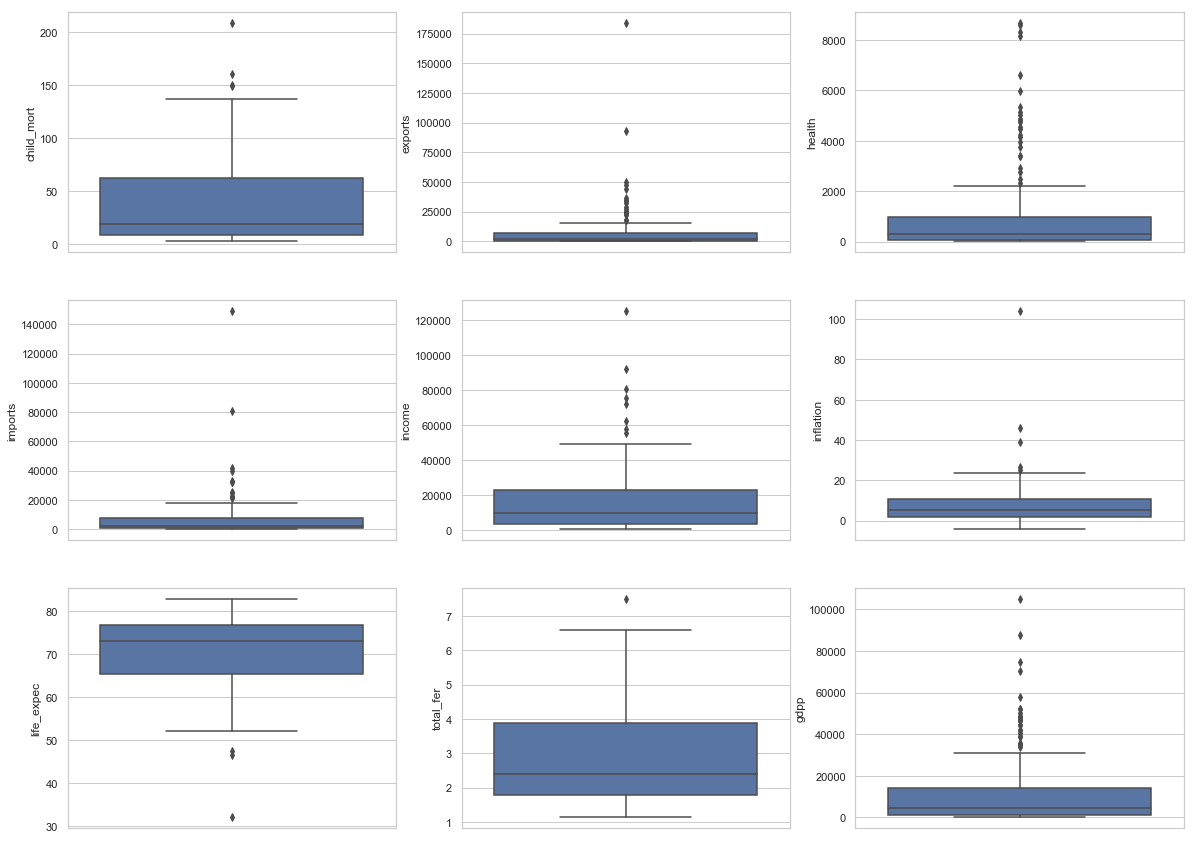

In [12]:
plt.figure(figsize=(20, 15))
for i, x_var in enumerate(df_out.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = x_var, data = df_out , orient = 'v')

In [13]:
for i, var in enumerate(df_out.columns):
    Q1 = df_out[var].quantile(0.01)
    Q3 = df_out[var].quantile(0.99)
    IQR = Q3 - Q1
    df_out_treat = df_out[(df_out[var] >= Q1 - 2*IQR) & (df_out[var] <= Q3 + 2*IQR)]

In [14]:
df_out_treat.shape

(167, 9)

In [15]:
df_out_treat.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [16]:
df_out_treat.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [17]:
df_out_treat.shape

(167, 9)

In [18]:
# Before manipulating data, we will save one copy of orignal data.
data_org = df.copy()
data_org.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# Step 3: Data Scaling

In [19]:
#Scaling the Data pre-processing
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_std = pd.DataFrame(standard_scaler.fit_transform(df_out_treat) ,columns = df_out_treat.columns, index=df_out_treat.index)

In [20]:
X_std.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


# Step 4: PCA

In [21]:
#Importing the the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [22]:
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [23]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

#### Ploting the screeplot to assess the principal components 


In [24]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

In [25]:
#Let's check the variance ratios
per_var = np.round(pca.explained_variance_ratio_ *100, decimals=1)
per_var

array([58.9, 18.4,  9.9,  6.1,  3. ,  2.5,  0.9,  0.2,  0. ])

In [26]:
labels = ["PC" + str(x) for x in range(1, len(per_var)+1)]

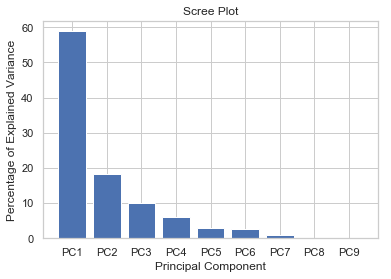

In [27]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

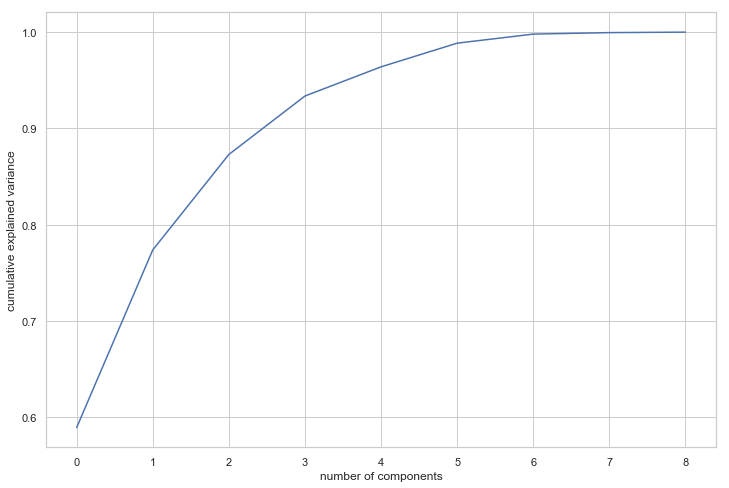

In [28]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('pca_no')
plt.show()

In [29]:
#pca_again = PCA(0.95)

In [30]:
#df_pca = pca_again.fit_transform(X_std)
#df_pca.shape

Around 95% of the information is being explained by 5 components, hence we choose 5 component


In [31]:
colnames = list(X_std.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.316392,0.476267,child_mort
1,0.342887,0.397311,exports
2,0.358535,0.155053,health
3,0.344865,0.370781,imports
4,0.380041,0.128384,income


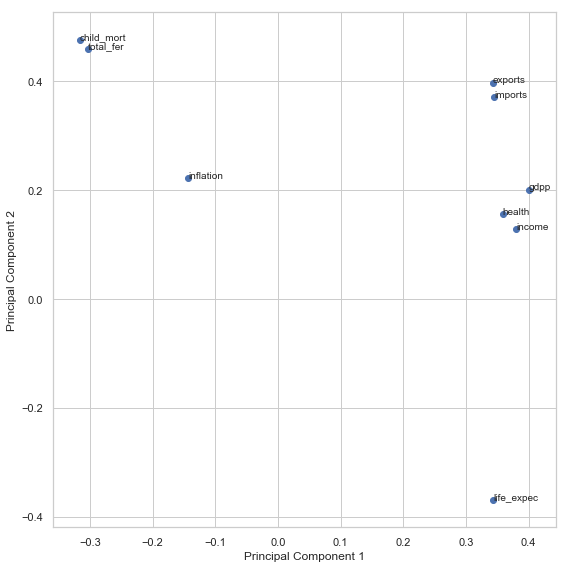

In [32]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [33]:
#Finally going ahead with incremental PCA for efficiency by choosing 5 PC
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [34]:
#### Basis transformation - getting the data onto our PCs
df_pca = pca_final.fit_transform(X_std)
df_pca.shape

(167, 5)

In [35]:
#Creating a transpose so that the each column is properly arranged
pc = np.transpose(df_pca)

In [36]:
pcs_df2 = pd.DataFrame({'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3],'PC5':pc[4]})

In [37]:
pcs_df2.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


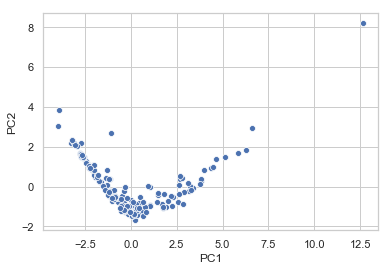

In [38]:
#Visualising the points on the PCs.
# one of the prime advatanges of PCA is that you can visualise high dimensional data
sns.scatterplot(x='PC1',y='PC2',data=pcs_df2)

In [39]:
pcs_df2.shape

(167, 5)

### Creating correlation matrix for the principal components to visualize any correlation 

In [40]:
pc_corr = np.corrcoef(pcs_df2.transpose())

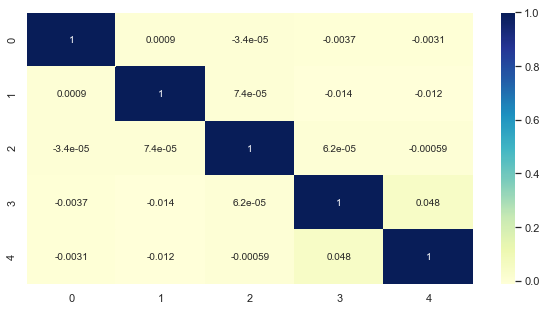

In [41]:
#plotting the correlation matrix
plt.figure(figsize = (10,5))
sns.heatmap(pc_corr, annot = True, cmap="YlGnBu")
plt.show()

# Step 5: Clustering

In [42]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [43]:
hopkins(pcs_df2)

0.9377437320237149

Since the value is > 0.5 the given dataset has a good tendency to form clusters.

### K- means Clustering

In [44]:
df2_kmean = pcs_df2.copy() # K-mean clustering df

In [45]:
# To perform KMeans clustering 
from sklearn.cluster import KMeans

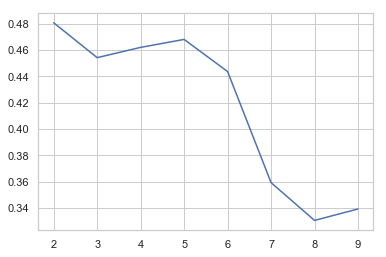

In [46]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(df2_kmean)
    sse_.append([k, silhouette_score(df2_kmean, kmeans.labels_)])

plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

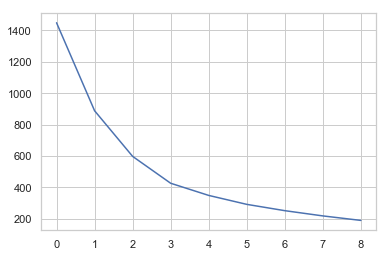

In [47]:
## From the above analysis we find that 4 or 5 seems to be a good number of clusters for K means algorithm
#Now let's proceed to the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df2_kmean)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

## Step 5b: Hierarchical clustering

In [48]:
# copying the data to Hier DF
df2_hier = pcs_df2.copy()

In [49]:
#Importing all the libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

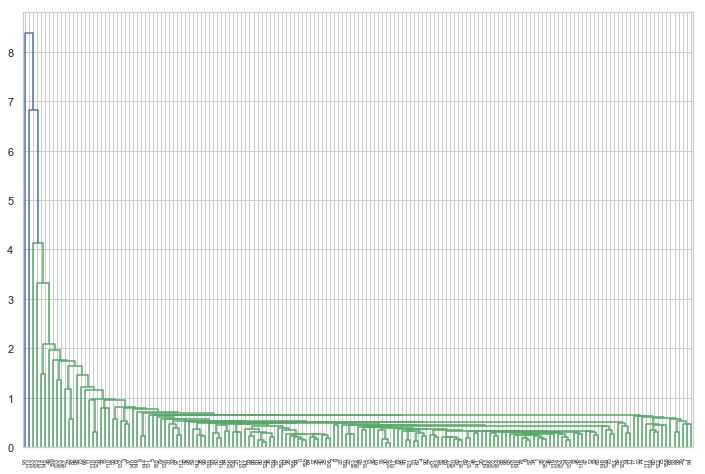

In [50]:
plt.figure(figsize=(12,8))
mergings_s = linkage(df2_hier, method = "single", metric='euclidean')
dendrogram(mergings_s, labels=df2_hier.index, leaf_rotation=90, leaf_font_size=6)
plt.show()

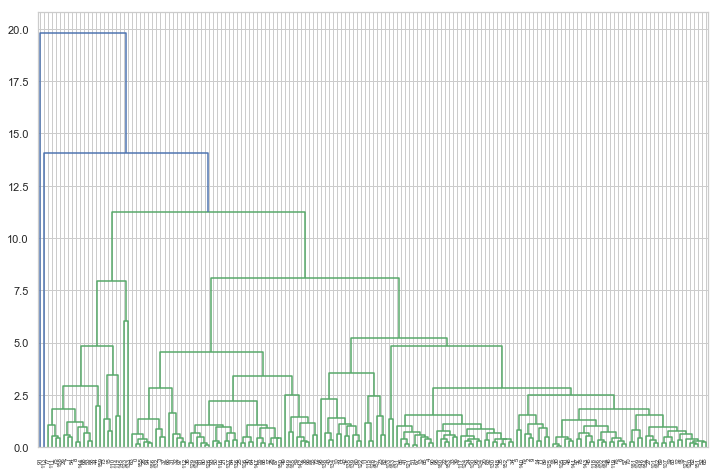

In [51]:
plt.figure(figsize=(12,8))
mergings_c = linkage(df2_hier, method = "complete", metric='euclidean')
dendrogram(mergings_c, labels=df2_hier.index, leaf_rotation=90, leaf_font_size=6)
plt.show()

In [52]:
clusterCut = pd.Series(cut_tree(mergings_c, n_clusters = 5).reshape(-1,))
df_pca_hc = pd.concat([pcs_df2, clusterCut], axis=1)
df_pca_hc.columns = ["PC1","PC2","PC3","PC4","PC5","Clust_no"]
df_pca_hc.head()

,PC1,PC2,PC3,PC4,PC5,Clust_no
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,0
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1
3,-2.723472,2.174966,0.597397,0.417695,0.056694,0
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1


In [53]:
df_clust = pd.concat([data_org['country'],df_pca_hc ], axis=1, join='outer', join_axes=None, ignore_index=False,
                     keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
df_clust.head()

,country,PC1,PC2,PC3,PC4,PC5,Clust_no
0,Afghanistan,-2.636338,1.472260,-0.548330,0.238302,0.061003,0
1,Albania,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1
2,Algeria,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1
3,Angola,-2.723472,2.174966,0.597397,0.417695,0.056694,0
4,Antigua and Barbuda,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1


In [54]:
df_clust = df_clust[['country','Clust_no']].merge(df, on = 'country')
df_clust.head()

,country,Clust_no,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,1,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,0,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# Step 6: Clusters Analysis

In [55]:
clust_child_mort = 	pd.DataFrame(df_clust.groupby(["Clust_no"]).child_mort.mean())
clust_exports = 	pd.DataFrame(df_clust.groupby(["Clust_no"]).exports.mean())
clust_health = 	pd.DataFrame(df_clust.groupby(["Clust_no"]).health.mean())
clust_imports = 	pd.DataFrame(df_clust.groupby(["Clust_no"]).imports.mean())
clust_income = 	pd.DataFrame(df_clust.groupby(["Clust_no"]).income.mean())
clust_inflation = 	pd.DataFrame(df_clust.groupby(["Clust_no"]).inflation.mean())
clust_life_expec = 	pd.DataFrame(df_clust.groupby(["Clust_no"]).life_expec.mean())
clust_total_fer = 	pd.DataFrame(df_clust.groupby(["Clust_no"]).total_fer.mean())
clust_gdpp = 	pd.DataFrame(df_clust.groupby(["Clust_no"]).gdpp.mean())

In [56]:
df = pd.concat([pd.Series(list(range(0,5))), clust_child_mort,clust_exports, clust_health, clust_imports,
               clust_income, clust_inflation, clust_life_expec,clust_total_fer,clust_gdpp], axis=1)
df.columns = ["Clust_no", "child_mort_mean", "exports_mean", "health_mean", "imports_mean", "income_mean", "inflation_mean",
               "life_expec_mean", "total_fer_mean", "gdpp_mean"]
df

,Clust_no,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,90.793617,885.224660,114.751355,835.999170,3870.702128,9.951809,59.212766,4.974043,1900.255319
1,1,19.552577,4744.509263,615.373097,4535.363104,16280.309278,7.111546,73.802062,2.200619,9459.505155
2,2,4.495238,26337.185714,4910.157619,22453.676190,47866.666667,1.637667,80.914286,1.790476,50038.095238
3,3,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000
4,4,130.000000,589.490000,118.131000,405.420000,5150.000000,104.000000,60.500000,5.840000,2330.000000


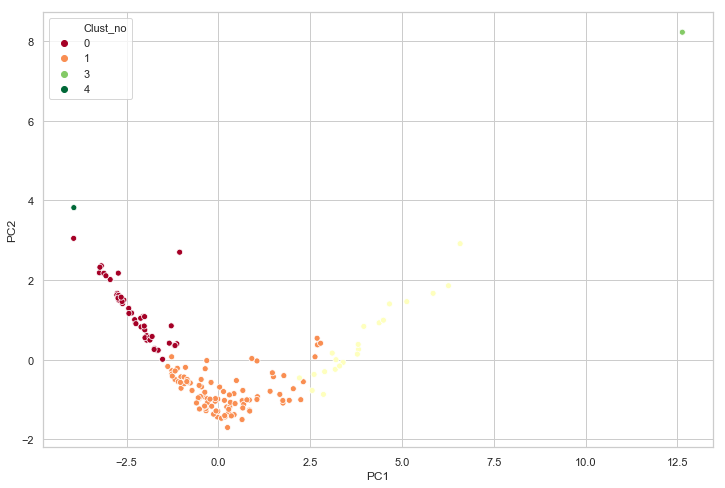

In [57]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'Clust_no', data = df_pca_hc, palette = 'RdYlGn')

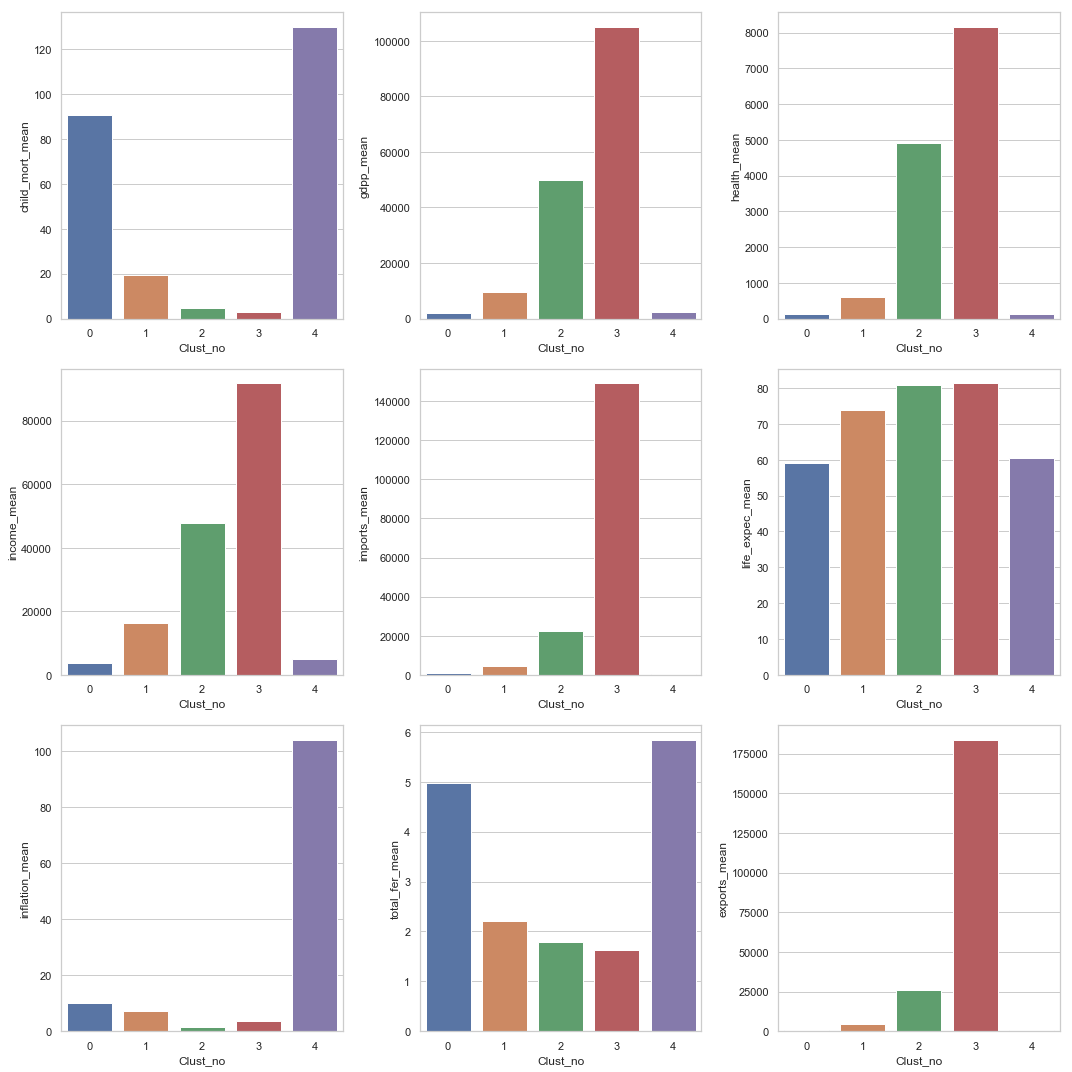

In [58]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x=df.Clust_no, y=df.child_mort_mean, ax = axs[0,0])
sns.barplot(x=df.Clust_no, y=df.gdpp_mean, ax = axs[0,1])
sns.barplot(x=df.Clust_no, y=df.health_mean, ax = axs[0,2])
sns.barplot(x=df.Clust_no, y=df.income_mean, ax = axs[1,0])
sns.barplot(x=df.Clust_no, y=df.imports_mean, ax = axs[1,1])
sns.barplot(x=df.Clust_no, y=df.life_expec_mean, ax = axs[1,2])
sns.barplot(x=df.Clust_no, y=df.inflation_mean, ax = axs[2,0])
sns.barplot(x=df.Clust_no, y=df.total_fer_mean, ax = axs[2,1])
sns.barplot(x=df.Clust_no, y=df.exports_mean, ax = axs[2,2])
plt.tight_layout()

In [59]:
df_clust[df_clust.Clust_no == 0].country.values

array(['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso',
       'Burundi', 'Cameroon', 'Central African Republic', 'Chad',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire",
       'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana',
       'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati',
       'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali',
       'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Pakistan',
       'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands',
       'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo',
       'Uganda', 'Yemen', 'Zambia'], dtype=object)

In [60]:
df_clust[df_clust.Clust_no == 1].country.values

array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Fiji', 'Georgia', 'Greece', 'Grenada', 'Guatemala', 'Guyana',
       'Hungary', 'India', 'Indonesia', 'Iran', 'Israel', 'Jamaica',
       'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyz Republic', 'Latvia',
       'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia',
       'Maldives', 'Malta', 'Mauritius', 'Micronesia, Fed. Sts.',
       'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Nepal',
       'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Romania', 'Russia', 'Samoa', 'Sau

In [61]:
df_clust[df_clust.Clust_no == 2].country.values

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland',
       'France', 'Germany', 'Iceland', 'Ireland', 'Italy', 'Japan',
       'Netherlands', 'New Zealand', 'Norway', 'Qatar', 'Singapore',
       'Sweden', 'Switzerland', 'United Kingdom', 'United States'],
      dtype=object)

In [62]:
df_clust[df_clust.Clust_no == 3].country.values

array(['Luxembourg'], dtype=object)

In [63]:
df_clust[df_clust.Clust_no == 4].country.values

array(['Nigeria'], dtype=object)